In [3]:
import pandas as pd

df_wave = pd.read_csv("/content/courier_wave_info_meituan.csv")
df_rider = pd.read_csv("/content/dispatch_rider_meituan.csv")
df_dispatch_waybill = pd.read_csv("/content/dispatch_waybill_meituan.csv")
df_allwaybill = pd.read_csv("/content/all_waybill_info_meituan_0322 2.csv")

In [4]:
print(df_allwaybill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219857 entries, 0 to 219856
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  219857 non-null  int64  
 1   dt                          219857 non-null  int64  
 2   order_id                    219857 non-null  int64  
 3   waybill_id                  219857 non-null  int64  
 4   courier_id                  219857 non-null  int64  
 5   da_id                       219857 non-null  int64  
 6   is_courier_grabbed          219857 non-null  int64  
 7   is_weekend                  219857 non-null  int64  
 8   estimate_arrived_time       219857 non-null  int64  
 9   is_prebook                  219857 non-null  int64  
 10  poi_id                      219857 non-null  int64  
 11  sender_lng                  219857 non-null  int64  
 12  sender_lat                  219857 non-null  int64  
 13  recipient_lng 

In [61]:

reentered = df_allwaybill[df_allwaybill["is_courier_grabbed"] == 0]
reentered_rejected = (
    df_allwaybill[df_allwaybill["is_courier_grabbed"] == 0]
    .groupby("order_id")
    .size()
    .reset_index(name="Rejected_orders")
    .sort_values("Rejected_orders", ascending=True)
)

print(reentered_rejected.tail())

       order_id  Rejected_orders
4659      28914                6
2321      14038                7
13418     93343                7
1937      11673                7
2722      16487                7


In [62]:
reentered_couriers = (
    df_allwaybill[df_allwaybill["is_courier_grabbed"] == 0]
    .groupby("courier_id")
    .size()
    .reset_index(name="Rejected_orders")
    .sort_values("Rejected_orders", ascending=True)
)

print(reentered_couriers)

      courier_id  Rejected_orders
3021        4839                1
3020        4838                1
3019        4837                1
3018        4829                1
3017        4822                1
...          ...              ...
535          868               96
1777        2836              102
247          407              103
640         1017              104
465          755              122

[3024 rows x 2 columns]


In [58]:
# reentered_rejected = reentered_rejected.tail(10)
# reentered_couriers = reentered_couriers.tail(10)

<Axes: title={'center': 'Rejects per order'}, xlabel='order_id'>

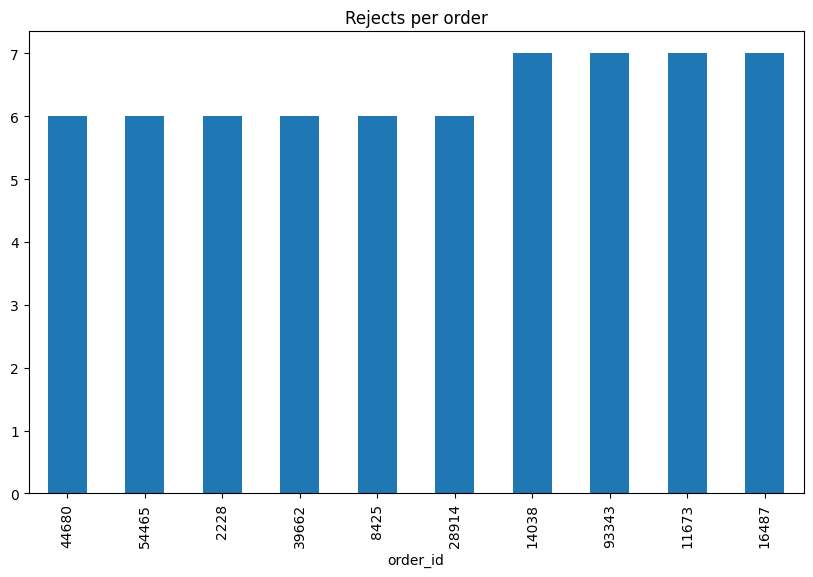

In [41]:
reentered_rejected.plot(
    kind="bar",
    x="order_id",
    y="Rejected_orders",
    figsize=(10,6),
    legend=False,
    title="Rejects per order"
)

In [55]:
thresholds = range(1, reentered_couriers["Rejected_orders"].max() + 1)
counts = [ (reentered_couriers["Rejected_orders"] > t).sum() for t in thresholds ]

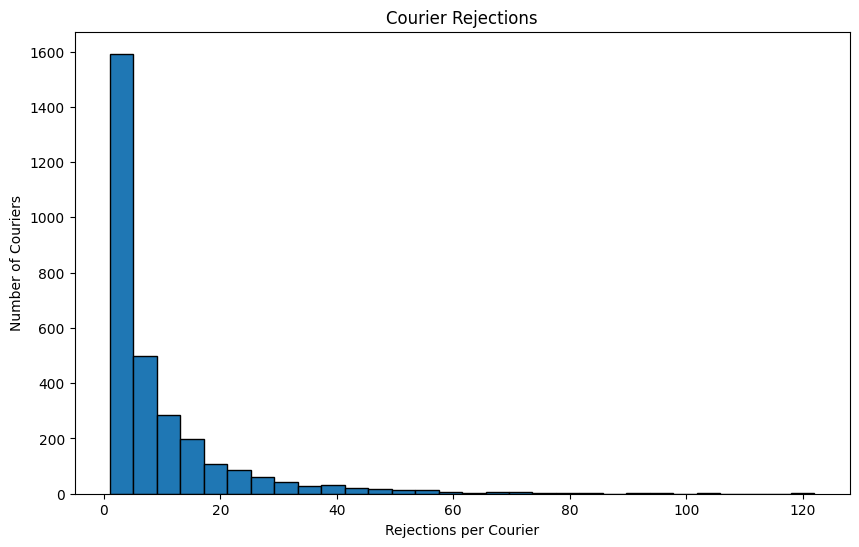

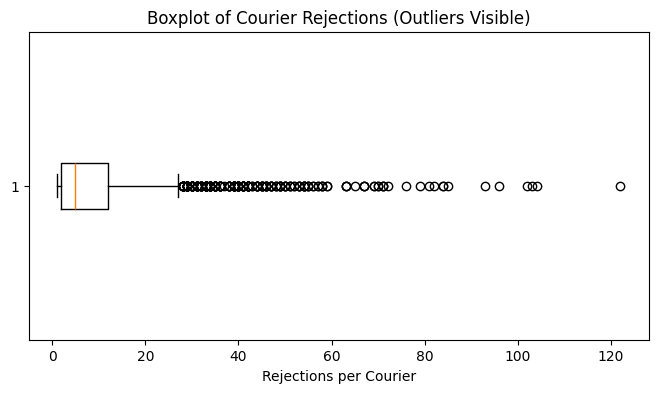

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(
    reentered_couriers["Rejected_orders"],
    bins=30,                  # increase bins for finer detail
    edgecolor="black"
)
plt.xlabel("Rejections per Courier")
plt.ylabel("Number of Couriers")
plt.title("Courier Rejections")
plt.figure(figsize=(8,4))
plt.boxplot(reentered_couriers["Rejected_orders"], vert=False)
plt.xlabel("Rejections per Courier")
plt.title("Boxplot of Courier Rejections (Outliers Visible)")
plt.show()
plt.show()



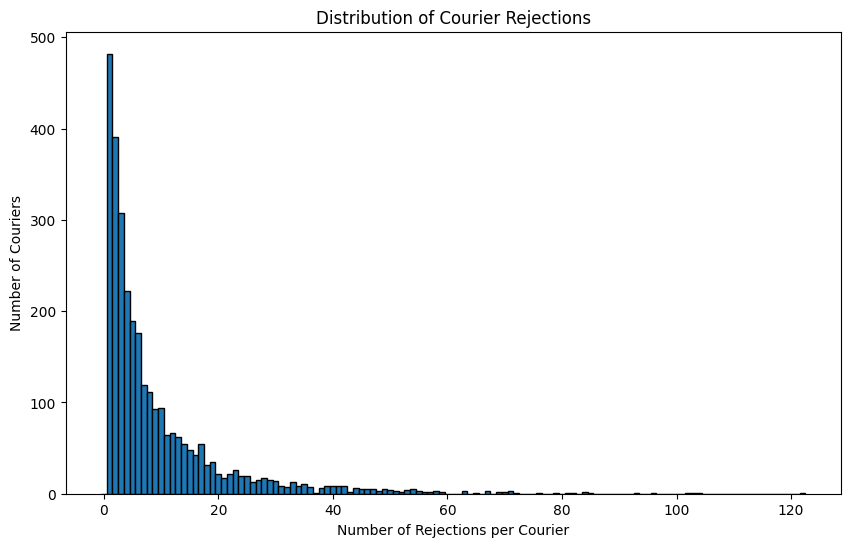

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(reentered_couriers["Rejected_orders"], bins=range(0, reentered_couriers["Rejected_orders"].max()+2), edgecolor="black", align="left")
plt.xlabel("Number of Rejections per Courier")
plt.ylabel("Number of Couriers")
plt.title("Distribution of Courier Rejections")
plt.show()